# Model evaluation

this notebook uses code from the playground notebook as well as from the Models folder

In [1]:
#Make imports work
import os
os.chdir('/Users/csuftitan/Desktop/NaiveBayesClassifier')


In [2]:
from Models import self_built_model
from Models import deep_learning_model
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer

2024-05-05 23:06:32.266243: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
model_dict = {
    "model_NB_1" : self_built_model.SelfBuiltNB_V1(),
    "model_NB_2" : self_built_model.SelfBuiltNB_V2(),
    "model_DL"   : deep_learning_model.KerasModel(),
    "model_MultiNB_sklearn" : MultinomialNB()
    #add more models here
}

#see how this preset is used in evaluation_dict below
def get_new_eval_preset():
    return {
        "accuracy": 0,
        "f1_score": 0,
        "confusion_matrix": 0,
        "precision": 0,
        "recall": 0
    }



#holds the evaluation results for each model
evaluation_dict = {
    "model_NB_1" : get_new_eval_preset(),
    "model_NB_2" : get_new_eval_preset(),
    "model_DL"   : get_new_eval_preset(),
    "model_MultiNB_sklearn" : get_new_eval_preset()
    #add more models here
}



In [4]:
data = pd.read_csv("Data/Preprocessing/data_cooked.csv")
data = data.dropna(subset=['Message']).reset_index(drop=True) #without this I get an error for missing values in training data (wonder why)


## Evaluating MultinomialNB from sklearn

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['Category'], test_size=0.3, random_state=42)

#using a pipeline can connect multiple steps:
pipeline = make_pipeline(
    CountVectorizer(),  # creates a matrix with word counts
    model_dict["model_MultiNB_sklearn"]  # the classifier from scikit
)

pipeline.fit(X=X_train, y=y_train)

#make predictions
y_pred = pipeline.predict(X_test)

#test and evaluation
evaluation_dict['model_MultiNB_sklearn']["confusion_matrix"] = confusion_matrix(y_test, y_pred)
evaluation_dict['model_MultiNB_sklearn']["f1_score"] = f1_score(y_test, y_pred)
evaluation_dict['model_MultiNB_sklearn']["precision"] = precision_score(y_test, y_pred)
evaluation_dict['model_MultiNB_sklearn']["recall"] = recall_score(y_test, y_pred)
evaluation_dict['model_MultiNB_sklearn']["accuracy"] = accuracy_score(y_test, y_pred)


## Evaluating Self Built Model 1

*WARNING*: Takes about 7:30 minute

In [6]:


X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['Category'], test_size=0.3, random_state=42)

model = model_dict["model_NB_1"]
model.fit(X_train,y_train)

#make predictions
y_pred = model.predict(X_test)

#test and evaluation
evaluation_dict['model_NB_1']["confusion_matrix"] = confusion_matrix(y_test, y_pred)
evaluation_dict['model_NB_1']["f1_score"] = f1_score(y_test, y_pred)
evaluation_dict['model_NB_1']["precision"] = precision_score(y_test, y_pred)
evaluation_dict['model_NB_1']["recall"] = recall_score(y_test, y_pred)
evaluation_dict['model_NB_1']["accuracy"] = accuracy_score(y_test, y_pred)



/Users/csuftitan/Desktop/NaiveBayesClassifier/Models/self_built_model.py:177: RuntimeWarning: divide by zero encountered in log
  log_prob_spam += count * np.log(word_data['P(Word|Spam)'].values[0])
/Users/csuftitan/Desktop/NaiveBayesClassifier/Models/self_built_model.py:178: RuntimeWarning: divide by zero encountered in log
  log_prob_not_spam += count * np.log(word_data['P(Word|NotSpam)'].values[0])


## Evaluating Self Built Model 2

*WARNING*: Takes about 4:30 minute

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['Category'], test_size=0.3, random_state=42)

model = model_dict["model_NB_2"]
model.fit(X_train,y_train)

#make predictions
y_pred = model.predict(X_test)

#test and evaluation
evaluation_dict['model_NB_2']["confusion_matrix"] = confusion_matrix(y_test, y_pred)
evaluation_dict['model_NB_2']["f1_score"] = f1_score(y_test, y_pred)
evaluation_dict['model_NB_2']["precision"] = precision_score(y_test, y_pred)
evaluation_dict['model_NB_2']["recall"] = recall_score(y_test, y_pred)
evaluation_dict['model_NB_2']["accuracy"] = accuracy_score(y_test, y_pred)

# Evaluating Keras DL Model

In [8]:
cv = CountVectorizer()
X = data['Message'] # make it a matrix, the network can handle (not sparse matrix)
y = data['Category']

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.3, random_state=42)

model = model_dict["model_DL"]
model.fit(X_train,y_train)

#make predictions
y_pred = model.predict(X_test)

#test and evaluation
evaluation_dict['model_DL']["confusion_matrix"] = confusion_matrix(y_test, y_pred)
evaluation_dict['model_DL']["f1_score"] = f1_score(y_test, y_pred)
evaluation_dict['model_DL']["precision"] = precision_score(y_test, y_pred)
evaluation_dict['model_DL']["recall"] = recall_score(y_test, y_pred)
evaluation_dict['model_DL']["accuracy"] = accuracy_score(y_test, y_pred)

106/106 [==============================] - 1s 8ms/step


## Final results

Plot all the scores

In [16]:
evaluation_dict["model_MultiNB_sklearn"]

{'accuracy': 0.976380277531739,
 'f1_score': 0.9346405228758171,
 'confusion_matrix': array([[2735,   23],
        [  57,  572]]),
 'precision': 0.9613445378151261,
 'recall': 0.9093799682034976}

In [17]:
evaluation_dict["model_NB_1"]

{'accuracy': 0.976380277531739,
 'f1_score': 0.9346405228758171,
 'confusion_matrix': array([[2735,   23],
        [  57,  572]]),
 'precision': 0.9613445378151261,
 'recall': 0.9093799682034976}

In [18]:
evaluation_dict["model_DL"]

{'accuracy': 0.976380277531739,
 'f1_score': 0.9346405228758171,
 'confusion_matrix': array([[2735,   23],
        [  57,  572]]),
 'precision': 0.9613445378151261,
 'recall': 0.9093799682034976}

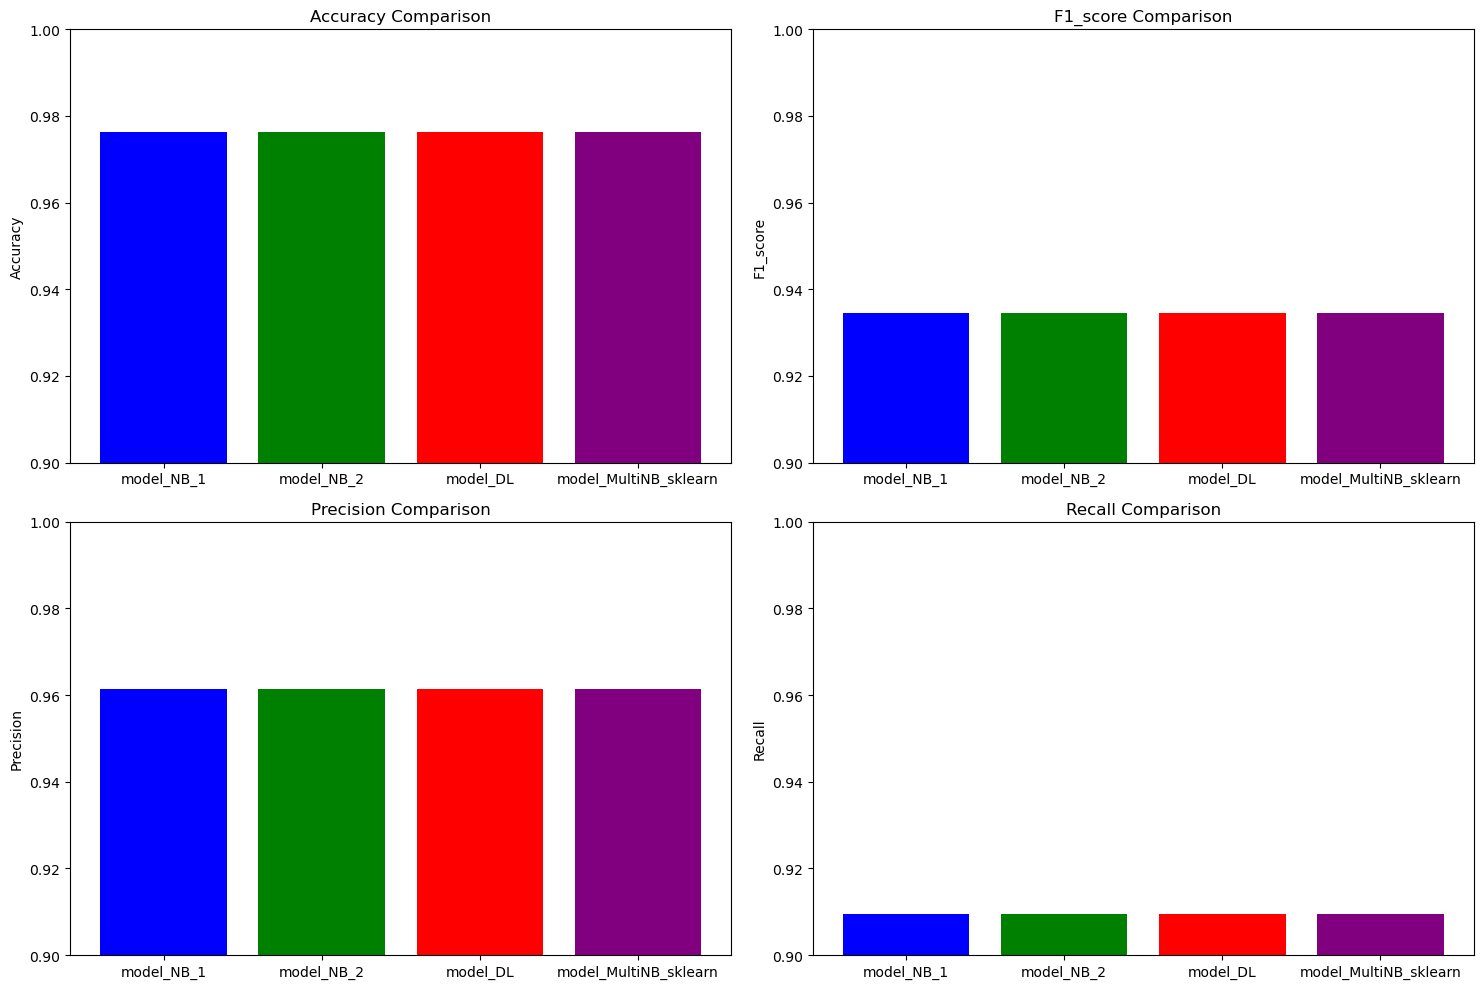

In [13]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['accuracy', 'f1_score', 'precision', 'recall']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for ax, metric in zip(axes, metrics):
    values = [evaluation_dict[model][metric] for model in evaluation_dict]
    ax.bar(evaluation_dict.keys(), values, color=['blue', 'green', 'red', 'purple'])
    ax.set_title(f'{metric.capitalize()} Comparison')
    ax.set_ylabel(metric.capitalize())
    ax.set_ylim(0.9, 1)

plt.tight_layout()
plt.show()


Plot the confusion matrices

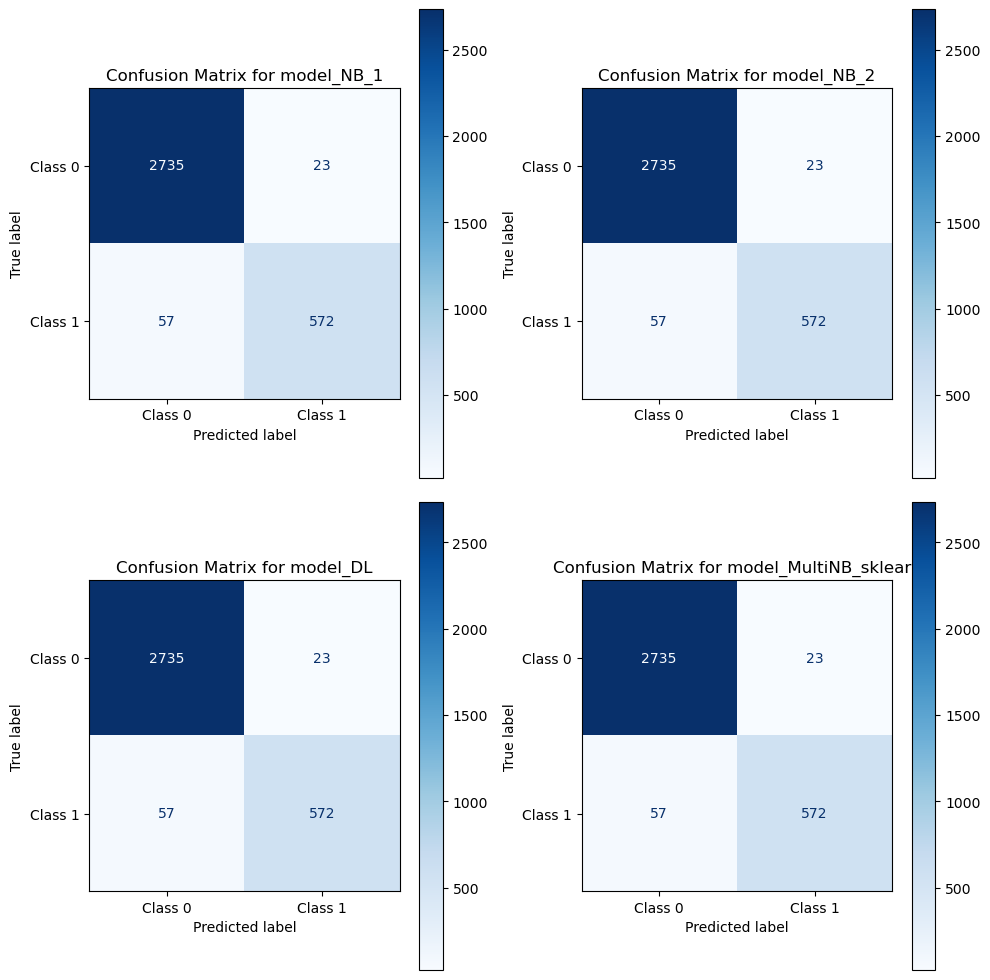

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plotten der Confusion Matrices
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axes = axes.flatten()

for ax, (model_name, data) in zip(axes, evaluation_dict.items()):
    ConfusionMatrixDisplay(data['confusion_matrix'], display_labels=['Class 0', 'Class 1']).plot(cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix for {model_name}')

plt.tight_layout()
plt.show()
